In this task, we will use the MNIST database. As stated by the creators of the dataset, “The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a
larger set available from NIST. The digits have been size-normalised and centred in a fixed-size image.”
Follow these steps:
● Create a file called mnist_task.ipynb.
● Load the MNIST dataset. You may download the files or use a library such
as Keras to access the dataset (e.g. from keras.datasets import mnist).
●Split the training data into a training and development(test) set.
○Add a comment explaining the purpose of the train, development(test) and test(validation) sets
●Use the RandomForestClassifier built into sklearn to create a classification model.
● Pick one parameter to tune, and explain why you chose this parameter.
● Choose which value for the parameter to set for testing on the test data and explain why.
● Print the confusion matrix for your Random Forest model on the test set.
● Report which classes the model struggles with the most.
● Report the accuracy, precision, recall, and f1-score.

In this task, we will use the MNIST database. As stated by the creators of the
dataset, “The MNIST database of handwritten digits, available from this page, has a
training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a
larger set available from NIST. The digits have been size-normalised and centred in
a fixed-size image.”
First read and run the MNIST.pynb example file to explore the MNIST test set
provided by sklearn. Then, follow the instructions to create a random forest model
using the mnist data. Use the MNIST training set for training and development and
the MNIST test set as the validation set
MNIST is the basic for Deep learnign

ref:
https://www.digitalocean.com/community/tutorials/mnist-dataset-in-python
https://www.analyticsvidhya.com/blog/2021/06/mnist-dataset-prediction-using-keras/
https://paperswithcode.com/paper/meta-pseudo-labels#code

https://www.kaggle.com/code/ashwani07/mnist-classification-using-random-forest

https://yann.lecun.com/exdb/mnist/

https://www.kaggle.com/code/ashwani07/mnist-classification-using-random-forest


https://medium.com/analytics-vidhya/knn-vs-decision-tree-vs-random-forest-for-handwritten-digit-recognition-470e864c75bc

In [15]:
#conmec@constantinos-Inspiron-5567:~$ conda activate
#(base) conmec@constantinos-Inspiron-5567:~$ activate tf
#(base) conmec@constantinos-Inspiron-5567:~$ activate tf
#(base) conmec@constantinos-Inspiron-5567:~$ conda activate tf
#(tf) conmec@constantinos-Inspiron-5567:~$ python -c "import tensorflow"

#from keras.datasets import mnist
import tensorflow as tf
from tensorflow.keras.models import Sequential
mnist = tf.keras.datasets.mnist

1.Load ans split the data

In [17]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()
#convert all the values from 0 to 255 for every pixel to a range of values from 0 to 1.
x_train, x_test = x_train / 255.0, x_test / 255.0


# Building the model
# Sequential to execute Deep Learning which is available under the Keras library.
# But this is not directly available for which we need to understand this simple line chart:
# Keras -> Models -> Sequential
# store the function in the variable model as 
# it makes it easier to access the function 
# every time instead of typing the 
# function every time, we can use the variable and call the function.
# convert the image into a dense pool of layers 
# and stack each layer one above the other and we use 
# ‘relu’ 
# as our activation function. 
# Then again, we stack a few more layers with ‘softmax’ as our activation function. 
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the entire model
# and use cross-entropy as our loss function, 
# to optimize our model use adam as our optimizer 
# and use accuracy as our metrics to evaluate our model.
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# Train the Model
# using .fit() function which
# takes the train set of the dependent 
# and the independent and dependent variable 
# as the input, and set epochs = 10, and set batch_size as 100. 
model.fit(x_train, y_train, epochs=10, batch_size = 100)
model.evaluate(x_test, y_test)

Epoch 1/10
600/600 [==============================] - 8s 12ms/step - loss: 0.3753 - accuracy: 0.8905
Epoch 2/10
600/600 [==============================] - 7s 11ms/step - loss: 0.1816 - accuracy: 0.9463
Epoch 3/10
600/600 [==============================] - 7s 11ms/step - loss: 0.1351 - accuracy: 0.9599
Epoch 4/10
600/600 [==============================] - 6s 11ms/step - loss: 0.1114 - accuracy: 0.9669
Epoch 5/10
600/600 [==============================] - 7s 11ms/step - loss: 0.0929 - accuracy: 0.9724
Epoch 6/10
600/600 [==============================] - 6s 10ms/step - loss: 0.0836 - accuracy: 0.9746
Epoch 7/10
600/600 [==============================] - 7s 11ms/step - loss: 0.0741 - accuracy: 0.9778
Epoch 8/10
600/600 [==============================] - 6s 10ms/step - loss: 0.0643 - accuracy: 0.9802
Epoch 9/10
600/600 [==============================] - 5s 9ms/step - loss: 0.0593 - accuracy: 0.9817
Epoch 10/10
313/313 [==============================] - 3s 8ms/step - loss: 0.0733 - accuracy

[0.07325155287981033, 0.9769999980926514]

Train set => X_train; y_train

Epochs => An epoch means training the neural network with all the training data for one cycle. An epoch is made up of one or more batches, where we use a part of the dataset to train the neural network. Meaning we send the model to train 10 times to get high accuracy. You could also change the number of epochs depending on how the model performs.

Batch_size => Batch size is a term used in machine learning and refers to the number of training examples utilized in one iteration. So basically, we send 100 images to train as a batch per iteration.

Predict accuracy
After training the model we have achieved an accuracy of 97.88% for the training data set. 

In [18]:
#get an overview of our model we use
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [19]:
# how well the model works in the testing
# dataset I use the scores variable to store
# the value and use the .evaluate() function 
# which takes the test set of the dependent and 
# the independent variables as the input.
# This computes the loss and the accuracy of the model
#  in the test set.
scores = model.evaluate(x_test, y_test)
print('Accuracy:', scores[1] * 100)

313/313 [==============================] - 3s 8ms/step - loss: 0.0733 - accuracy: 0.9770
Accuracy: 97.69999980926514


we have achieved the result and we secured an accuracy of more than 96% in the test set which is very much appreciable, and the motive of the blog is achieved.

## Trying the sklearn approach and RandomForest classifier  

In [1]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

2024-09-05 18:31:43.986523: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
data = mnist.load_data()
type(data)

tuple

Split the dataset into train and test


In [6]:
(X_train, y_train), (X_test, y_test) = data
print('MNIST Dataset Shape:')
print('X_train: ' + str(X_train.shape))
print('The pixels of the image: ' + str(X_train[0].shape))
print('y_train: ' + str(y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('y_test:  '  + str(y_test.shape))

MNIST Dataset Shape:
X_train: (60000, 28, 28)
The pixels of the image: (28, 28)
y_train: (60000,)
X_test:  (10000, 28, 28)
y_test:  (10000,)


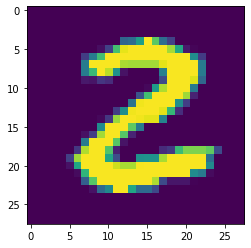

2


In [7]:
# view an image (e.g. 25) and print its corresponding label
img_index = 25
plt.imshow(X_train[img_index,:,:])
plt.show()
print(y_train[img_index])
%matplotlib inline

Reshape and store so we can have access to every pixel of the image.  The reason to access every pixel is that only then we can apply deep learning ideas and can assign color code to every pixel.

In [8]:
X_train = X_train.reshape((X_train.shape[0], 28*28)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28*28)).astype('float32')

We already know that each pixel has its unique color code and also we know that it has a maximum value of 255. To perform Machine Learning, it is important to convert all the values from 0 to 255 for every pixel to a range of values from 0 to 1. The simplest way is to divide the value of every pixel by 255 to get the values in the range of 0 to 1.

In [9]:
X_train = X_train / 255
X_test = X_test / 255

Now we are done with splitting the data into test and train as well as making the data ready for further use.

##Step 3-  Train the model

In [10]:
from sklearn.ensemble import RandomForestClassifier

#instantiate the model
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

#X2_train = X_train.transpose(2, 0, 1).reshape(-1, 28*28)
#X2_train = X_train.reshape(-1, 2)
#y2_train=y_train.reshape(-1)
#clf.fit(X2_train, y2_train)

RandomForestClassifier()

### Test results

In [11]:
from sklearn.metrics import accuracy_score
X_test.shape


(10000, 784)

In [21]:
y_test.shape

#= X_test.transpose(2, 0, 1).reshape(-1, 28*28)
#y_test = y_test.reshape(-1)


y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9704


In [25]:
from sklearn.metrics import f1_score, precision_score, recall_score

# average f1 score
av_f1 = f1_score(y_test, y_pred, average='micro')
print(av_f1)


0.9704


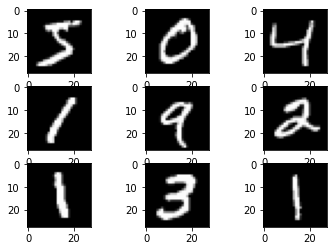

In [32]:
from matplotlib import pyplot
for i in range(9):  
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(x_train[i], cmap=pyplot.get_cmap('gray'))
pyplot.show()

Trying to tune the model

In [40]:
from sklearn.model_selection import cross_val_score
# tried to tune the model
# Cross validation
clf2=RandomForestClassifier(n_estimators=100)
clf2.fit(X_train, y_train)
score = cross_val_score(clf2, X_train, y_train)
print (np.mean(score))

0.9661333333333333


In [41]:
from sklearn.metrics import classification_report, confusion_matrix
print ("Classification Report")
print(classification_report(y_test, y_pred))
print ("Confusion Report")
print(confusion_matrix(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.96      1032
           3       0.96      0.97      0.96      1010
           4       0.98      0.97      0.98       982
           5       0.98      0.96      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.96      0.97      1028
           8       0.96      0.96      0.96       974
           9       0.96      0.95      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

Confusion Report
[[ 971    1    0    0    0    3    1    1    2    1]
 [   0 1123    2    4    0    1    2    0    2    1]
 [   5    0 1001    5    3    0    4    8    6    0]
 [   0    0   12  975    0    5    0    8  

Text(69.0, 0.5, 'Truth')

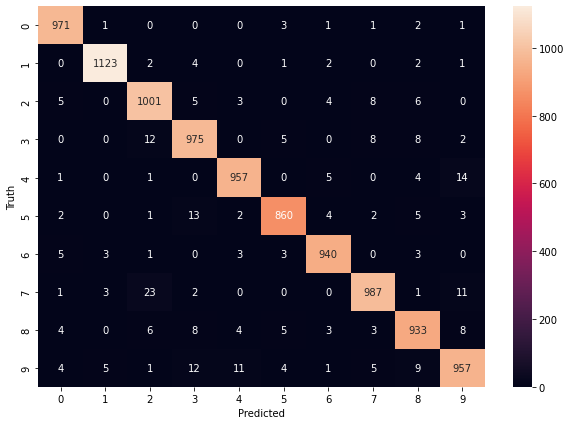

In [47]:
clf2 = confusion_matrix(y_test , y_pred)
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(clf2,annot=True , fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')
